In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a CSV file
df = pd.read_csv('/Users/zoobiasyed/Downloads/Walmart.csv')

# Display the first few rows of the DataFrame to verify it's loaded correctly
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


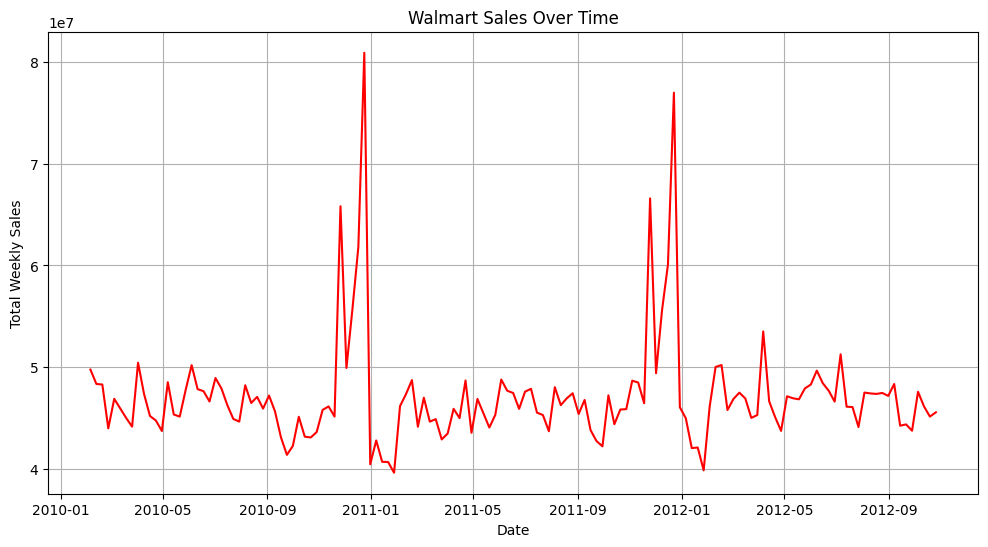

In [4]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Group sales by date to find the total sales across all stores
sales_over_time = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['Date'], sales_over_time['Weekly_Sales'], color='red')
plt.title('Walmart Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()


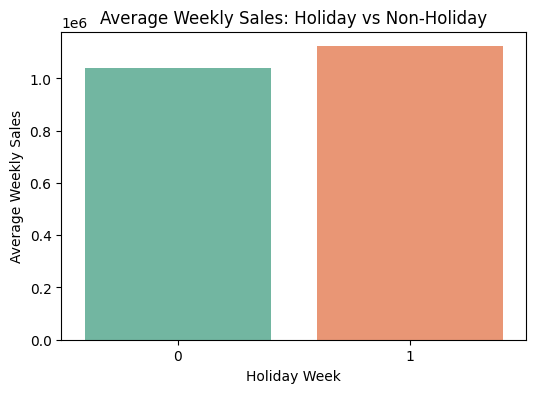

In [5]:
# Average sales during holiday weeks vs non-holiday weeks
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Plot
plt.figure(figsize=(6, 4))
# Add 'Holiday_Flag' as hue for coloring based on holiday flag
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, hue=holiday_sales.index, palette='Set2', legend=False)
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Holiday Week')
plt.ylabel('Average Weekly Sales')
plt.show()


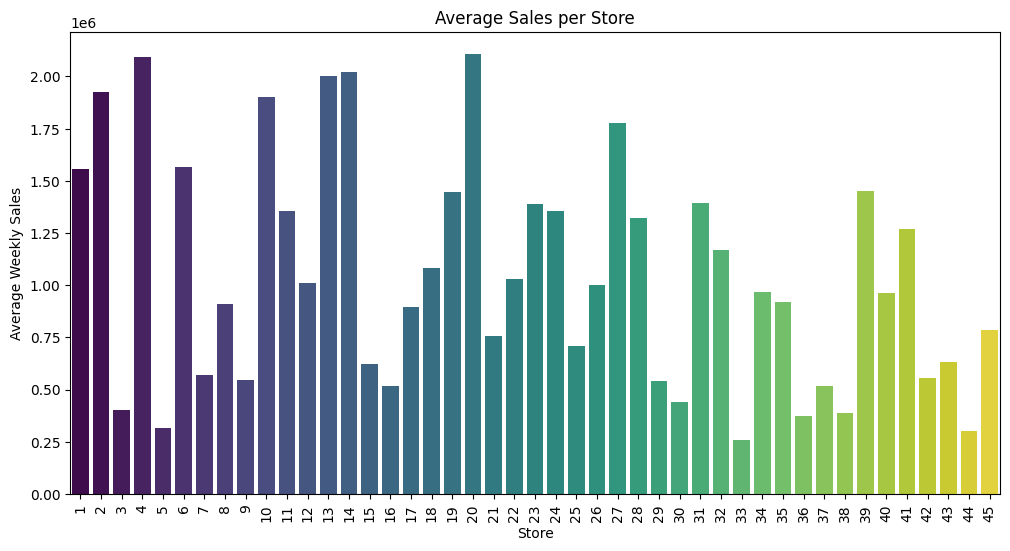

In [6]:
# Average sales per store
store_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Plotting the average sales per store
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, hue='Store', palette='viridis', legend=False)
plt.title('Average Sales per Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=90)
plt.show()


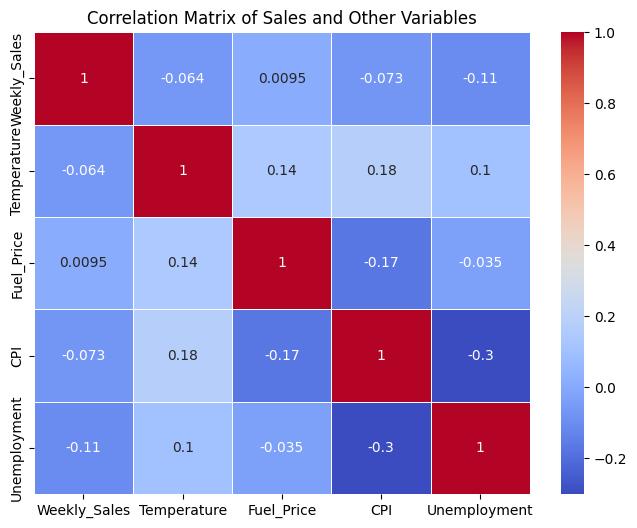

In [7]:
# Correlation matrix
corr_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Sales and Other Variables')
plt.show()
